# Aprendizagem de Máquina: Regressão Linear 



In [8]:
### Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Lendo o dataset
# dados_regressao_linear_2
df = pd.read_csv('/content/drive/MyDrive/Aprendizagem_de_Maquina_2021-2/5_Regressao_Linear/advertising.csv', delimiter=',')


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


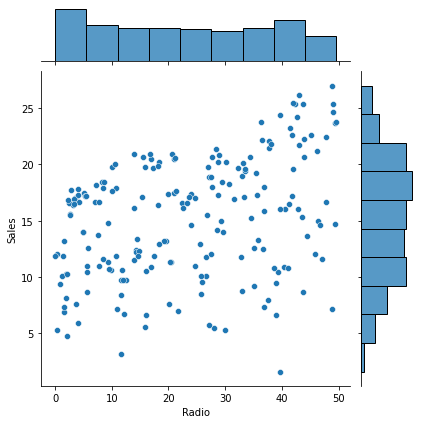

In [12]:
sns.jointplot(x='Radio', y='Sales', data=df)

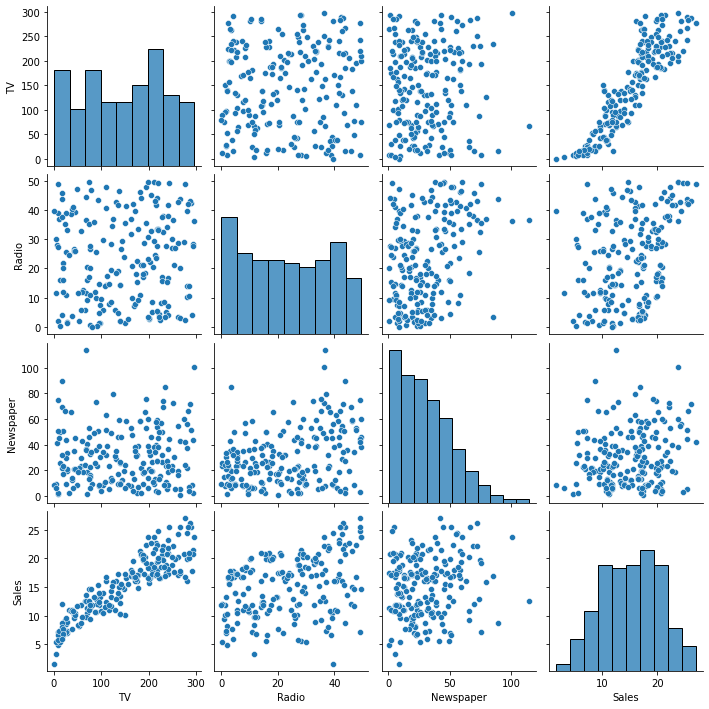

In [9]:
sns.pairplot(df)

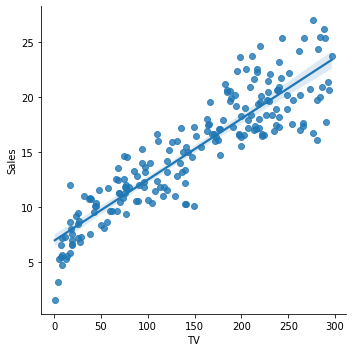

In [10]:
sns.lmplot(x='TV', y='Sales', data=df)

In [16]:
X = pd.DataFrame()
X = df.drop(['Sales'],axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
y = df['Sales']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
# Apresentando os coeficientes para cada variável do meu X
lm.coef_

array([0.05358869, 0.10270677, 0.00793167])

In [24]:
# Para validar o modelo no conjunto de teste, você precisa utilizar o método predict()
y_pred_test = lm.predict(X_test)

Text(0, 0.5, 'y predito')

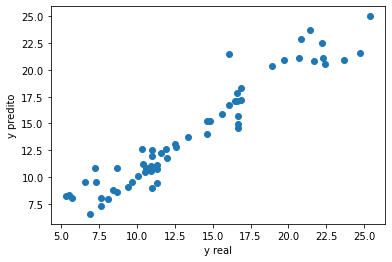

In [26]:
# Criar um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.
plt.scatter(y_test, y_pred_test)
plt.xlabel('y real')
plt.ylabel('y predito')

In [ ]:
#Avaliar o Modelo

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R:', metrics.r2_score(y_test,y_pred_test))

MAE: 1.1594875061090582
MSE: 2.541624036229147
RMSE: 1.5942471691143587
R: 0.9091484341849799


In [29]:
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

In [30]:
print('R-adjust:', adjusted_R(y_test, y_pred_test, X_train.shape[1]))

R-adjust: 0.9042813860163181


In [31]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
TV,0.053589
Radio,0.102707
Newspaper,0.007932
